## Neural Networks

### Creating image classifier using neural networks

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.17.0
3.5.0


#### Load the Fashion MNIST dataset from Keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Create the model using the Sequential API

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\Grzegorz\Desktop\um\neural_networks\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
model.get_layer(hidden1.name) is hidden1

True

In [12]:
weights, biases = hidden1.get_weights()

In [13]:
weights

array([[ 0.07038568,  0.03641225,  0.04646295, ...,  0.00744832,
         0.05344234, -0.01335751],
       [ 0.05324367,  0.0454919 ,  0.06819087, ...,  0.06152692,
        -0.06079804, -0.06914893],
       [ 0.01076448,  0.01663428,  0.03834846, ...,  0.00994996,
         0.05768313,  0.05288363],
       ...,
       [ 0.07266909,  0.07095541, -0.04710111, ..., -0.02890238,
         0.00819042,  0.03117079],
       [-0.03857501,  0.03351974, -0.01770844, ...,  0.03916616,
        -0.04428945,  0.05582006],
       [-0.01105613, -0.06626121,  0.06494157, ..., -0.01840235,
        -0.05453743, -0.06381842]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

#### Compile the model

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### Train the model

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.6916 - loss: 0.9934 - val_accuracy: 0.8186 - val_loss: 0.5219
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.8253 - loss: 0.5068 - val_accuracy: 0.7738 - val_loss: 0.5918
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.8414 - loss: 0.4554 - val_accuracy: 0.8424 - val_loss: 0.4439
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.8517 - loss: 0.4214 - val_accuracy: 0.8584 - val_loss: 0.4117
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.8604 - loss: 0.4003 - val_accuracy: 0.8614 - val_loss: 0.4021
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.8671 - loss: 0.3798 - val_accuracy: 0.8674 - val_loss: 0.3798
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.8703 - loss: 0.3668 - val_accuracy: 0.8680 - val_loss: 0.3748
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8740 -

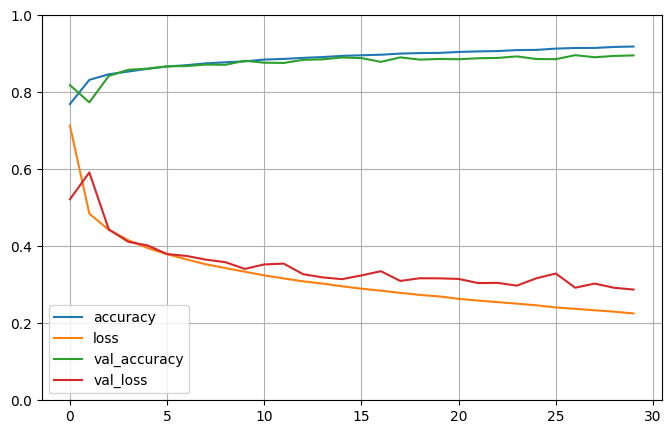

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8600 - loss: 55.5459


[58.8311882019043, 0.8560000061988831]

#### Make predictions

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Predict_classes no longer available in TensorFlow >= 2.6

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

### Building a Regression MLP Using the Sequential API

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
X_train.shape[1:]

(8,)

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 1.0592 - val_loss: 0.5425
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 1.0745 - val_loss: 0.4979
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.4613 - val_loss: 0.4709
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.4674 - val_loss: 0.4735
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.4307 - val_loss: 0.4496
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.4290 - val_loss: 0.4355
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.4447 - val_loss: 0.4331
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.4247 - val_loss: 0.4380
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.4101 - val_loss: 0.4188
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.4036 - val_loss: 0.4169
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.4047 - val_loss: 0.4121
Epoch 12/20
363/363 ━━━━━━━━━━

### Building Complex Models Using the Functional API

In [30]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [31]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 1.2919 - val_loss: 0.6291
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 142.2568 - val_loss: 0.6874
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.6278 - val_loss: 0.5783
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.5633 - val_loss: 0.5550
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.5337 - val_loss: 0.5319
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.6121 - val_loss: 0.5160
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.5036 - val_loss: 0.5080
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.5190 - val_loss: 0.5120
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.5083 - val_loss: 0.5013
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.5009 - val_loss: 0.5267
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4919 - val_loss: 0.5217
Epoch 12/20
363/363 ━━━━━━━━

In [32]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        270 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 30)        │        930 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_5[0]… │
│ (Concatenate)       │                   │            │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,241 (4.85 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#### Multiple inputs

In [33]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.01))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [36]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 1.3198 - val_loss: 0.5461
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.5044 - val_loss: 0.5455
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 1.0011 - val_loss: 0.5038
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.4656 - val_loss: 0.4740
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.4481 - val_loss: 0.4588
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.4496 - val_loss: 0.4534
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.4234 - val_loss: 0.4460
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.4250 - val_loss: 0.5624
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.4066 - val_loss: 0.4142
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.3914 - val_loss: 0.4088
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.3882 - val_loss: 0.3974
Epoch 12/20
363/363 ━━━━━━━━━━

In [37]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 30)        │        930 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,178 (4.61 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [38]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [39]:
y_pred

array([[0.8488754],
       [2.8812857],
       [2.469281 ]], dtype=float32)